<a href="https://colab.research.google.com/github/Maliph-Guye/brain_tumor_detection_model/blob/main/brain_tumor_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Building a brain tumor detection model using CNN deep learning
"""

In [49]:
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [12]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [21]:
!unzip "/content/mri_images.zip" -d "/content/mri_images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0726.jpg  
  inflating: /content/mri_images/Files/Training/glioma/Tr-gl_0727.jpg  
  inflating: 

In [25]:
# Train and set split
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

for i in labels:
    folderPath = os.path.join('/content/mri_images/Files/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/mri_images/Files/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [26]:
#Shuffle images for training
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(7023, 150, 150, 3)

In [27]:
# Train testing split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
import tensorflow as tf

# Re-load and split data to ensure y_train and y_test are in 1D string format
X = []
Y = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

for i in labels:
    folderPath = os.path.join('/content/mri_images/Files/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        Y.append(i)

for i in labels:
    folderPath = os.path.join('/content/mri_images/Files/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        Y.append(i)

X = np.array(X)
Y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)


# Convert string labels to numerical categories
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert numerical categories to one-hot encoded vectors
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(labels))
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(labels))

y_train = y_train_categorical
y_test = y_test_categorical

In [52]:
#CNN
model = Sequential()
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 50s 180ms/step - accuracy: 0.3270 - loss: 2.3705 - val_accuracy: 0.5000 - val_loss: 1.1835
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.6529 - loss: 0.8240 - val_accuracy: 0.5174 - val_loss: 1.2771
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.7366 - loss: 0.6277 - val_accuracy: 0.5111 - val_loss: 1.1200
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.7839 - loss: 0.5205 - val_accuracy: 0.5823 - val_loss: 1.4229
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8061 - loss: 0.4713 - val_accuracy: 0.5016 - val_loss: 1.6697
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8343 - loss: 0.4024 - val_accuracy: 0.5744 - val_loss: 1.5263
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8499 - loss: 0.3841 - val_accuracy: 0.6076 - val_loss: 2.0212
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8853 - loss: 0.3067 -

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

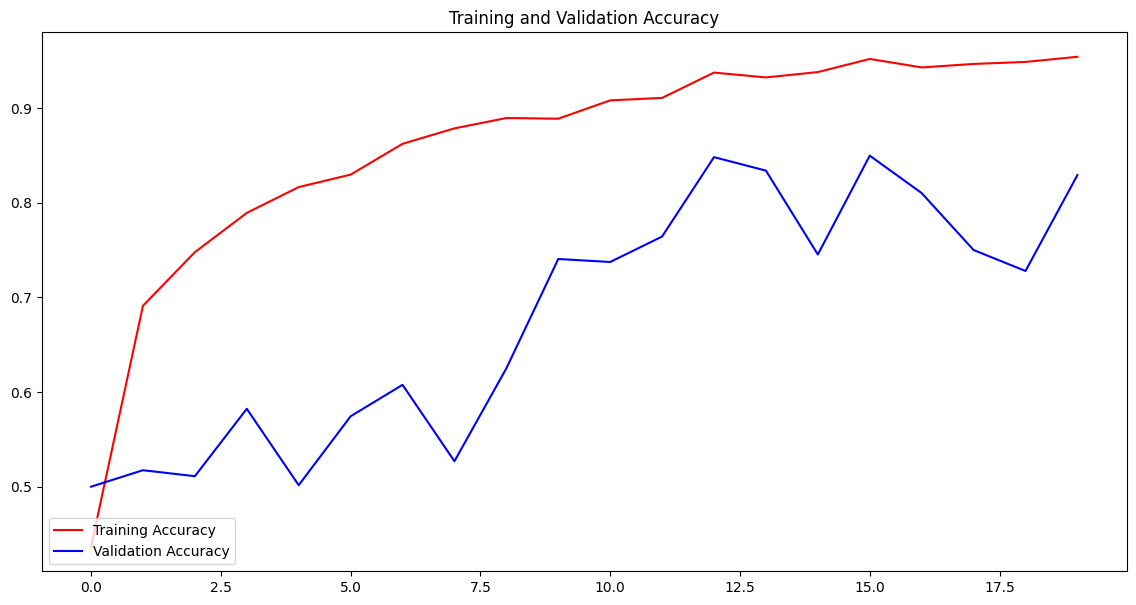

In [59]:
#model.save('brain_tumor_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc,'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')
plt.show()

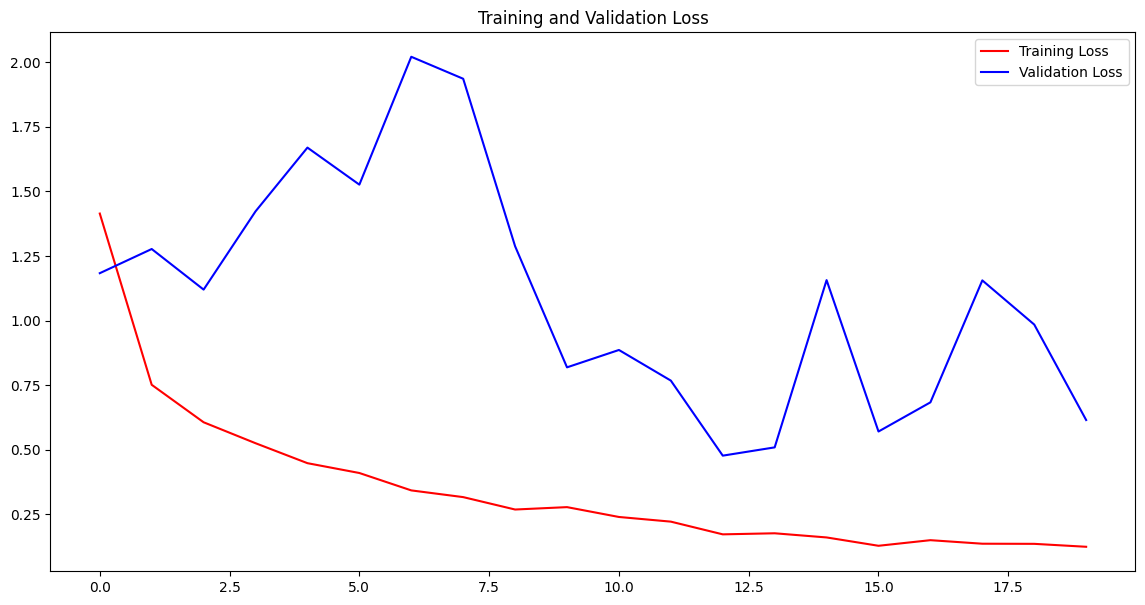

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss,'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
# Prediction
img = cv2.imread('/content/mri_images/Files/Training/pituitary/Tr-piTr_0001.jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [63]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

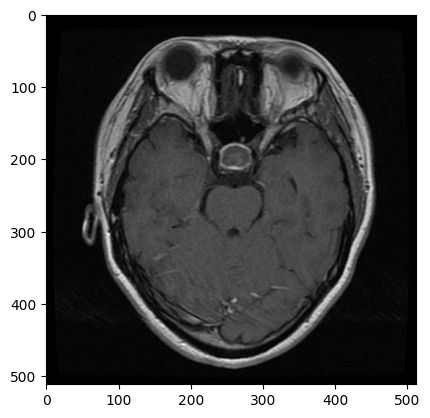

In [66]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/mri_images/Files/Training/pituitary/Tr-piTr_0001.jpg')
plt.imshow(img)
plt.show()

In [67]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


np.int64(3)